<a href="https://colab.research.google.com/github/lgiesen/forest_height/blob/main/archive/explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# the zipped data is uploaded in the root_path folder
root_path = 'drive/MyDrive/Colab Notebooks/data/'
path_images = f'{root_path}images/'
path_masks = f'{root_path}masks/'
user = "lgiesen"
repo = "forest_height"
!git clone https://github.com/{user}/{repo}.git

Cloning into 'forest_height'...
remote: Enumerating objects: 412, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 412 (delta 30), reused 20 (delta 4), pack-reused 348
Receiving objects: 100% (412/412), 21.34 MiB | 19.00 MiB/s, done.
Resolving deltas: 100% (221/221), done.


In [3]:
%run /content/forest_height/src/generate_data.py

In [ ]:
%%time
# unzip data
%cd "drive/MyDrive/Colab Notebooks/data/"
# use -B flag to rename files if there is a file with its name
!for f in *.zip; do unzip -B "$f"; done
%cd ../../../../

/content/drive/MyDrive/Colab Notebooks/data
Archive:  images_02.zip
  inflating: images/image_000.npy    
  inflating: images/image_001.npy    
  inflating: images/image_002.npy    
  inflating: images/image_003.npy    
  inflating: images/image_004.npy    
  inflating: images/image_005.npy    
  inflating: images/image_006.npy    
  inflating: images/image_007.npy    
  inflating: images/image_008.npy    
  inflating: images/image_009.npy    
  inflating: images/image_010.npy    
  inflating: images/image_011.npy    
  inflating: images/image_012.npy    
  inflating: images/image_013.npy    
  inflating: images/image_014.npy    
  inflating: images/image_015.npy    
  inflating: images/image_016.npy    
  inflating: images/image_017.npy    
  inflating: images/image_018.npy    
  inflating: images/image_019.npy    
Archive:  images_train.zip
  inflating: images/image_000.npy    
  inflating: images/image_001.npy    
  inflating: images/image_002.npy    
  inflating: images/image_003.n

In [4]:
def save_dataset(X_train, X_test, y_train, y_test):
  X_train.to_pickle("X_train.pkl")
  y_train.to_pickle("y_train.pkl")
  X_test.to_pickle("X_test.pkl")
  y_test.to_pickle("y_test.pkl")
  %cd ../../

In [14]:
X, y = extract_data(path_images, path_masks)

In [15]:
df = extract_labels(X, y)

In [32]:
X = df.loc[:, df.columns != 'Label']
y = df.loc[:, df.columns == 'Label']
del df
X = calculate_ndvi(X, False)

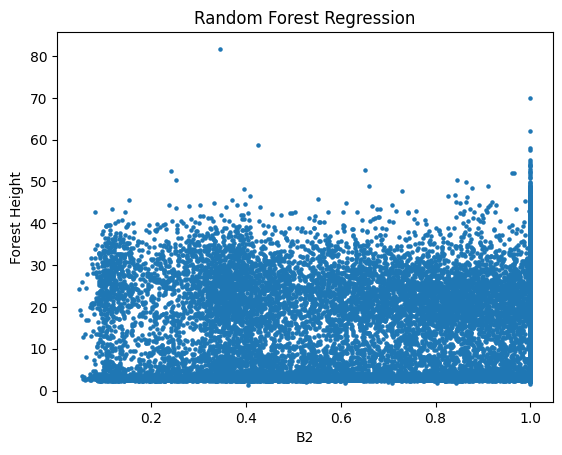

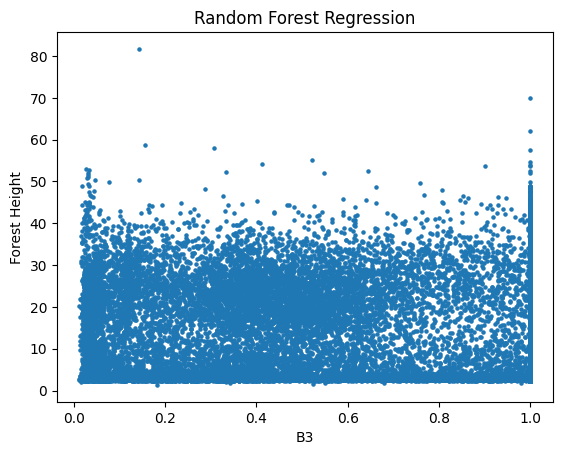

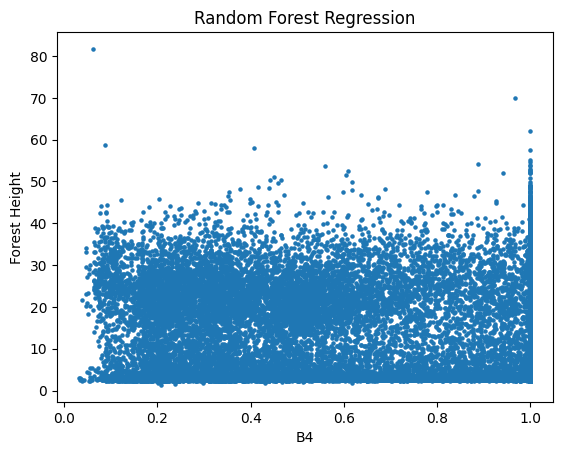

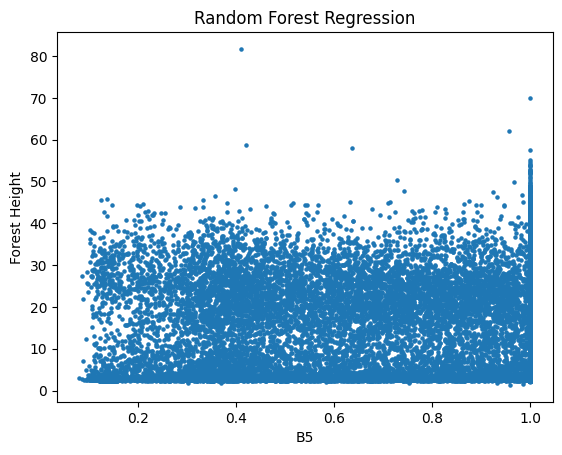

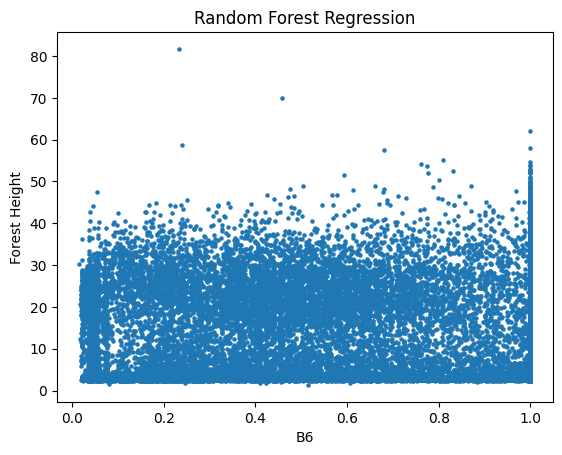

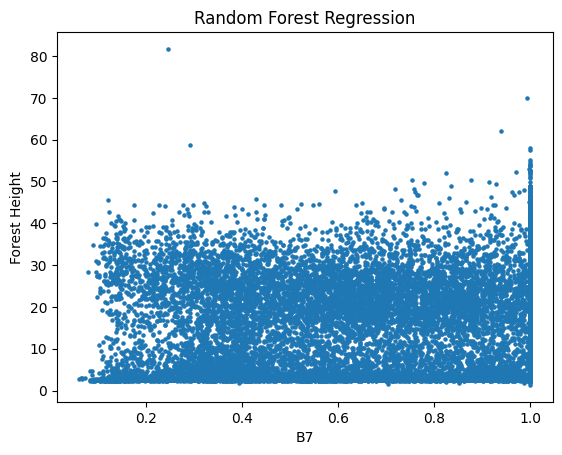

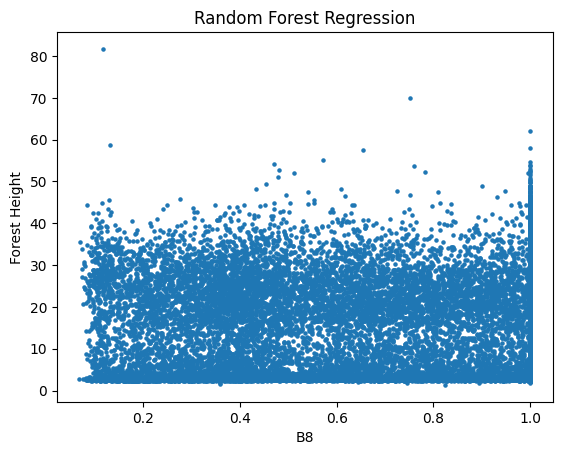

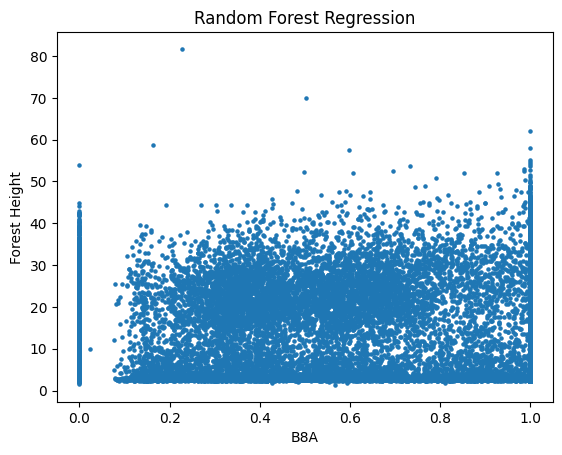

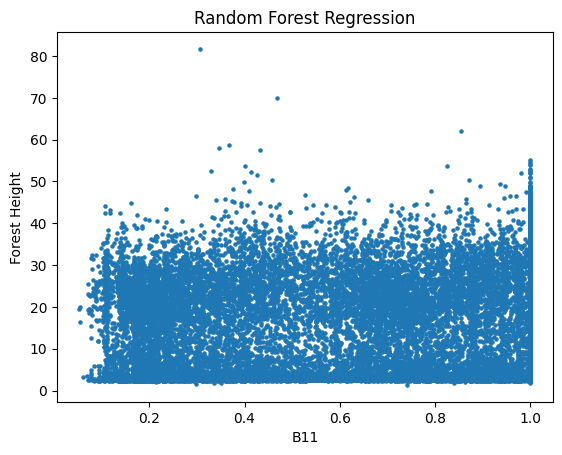

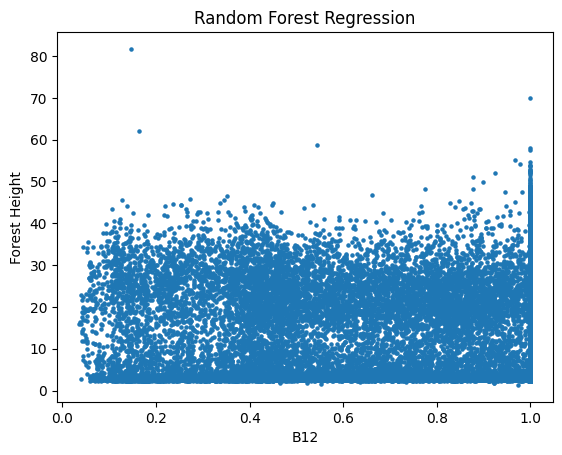

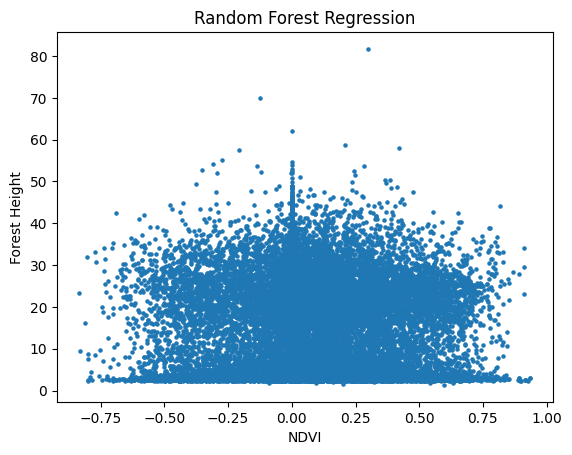

In [55]:
from matplotlib import pyplot as plt
# only the NDVI channel is plotted on the x-axis
# because 11-dimensional data cannot be visualized for humans
fig, ax = plt.subplots()
for col in X.columns:
  plt.scatter(X[col], y, 5)
  plt.title('Random Forest Regression')
  plt.xlabel(col)
  plt.ylabel('Forest Height')
  plt.show()